# Activity: Perform multiple linear regression

multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables.
will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales.

In [16]:
import pandas as pd
import numpy as np
import os 
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
file_name = 'marketing_sales_data.csv'
file_path = os.path.join(cwd,'raw_data',file_name)
mktg_raw_data = pd.read_csv(file_path)

mktg_raw_data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


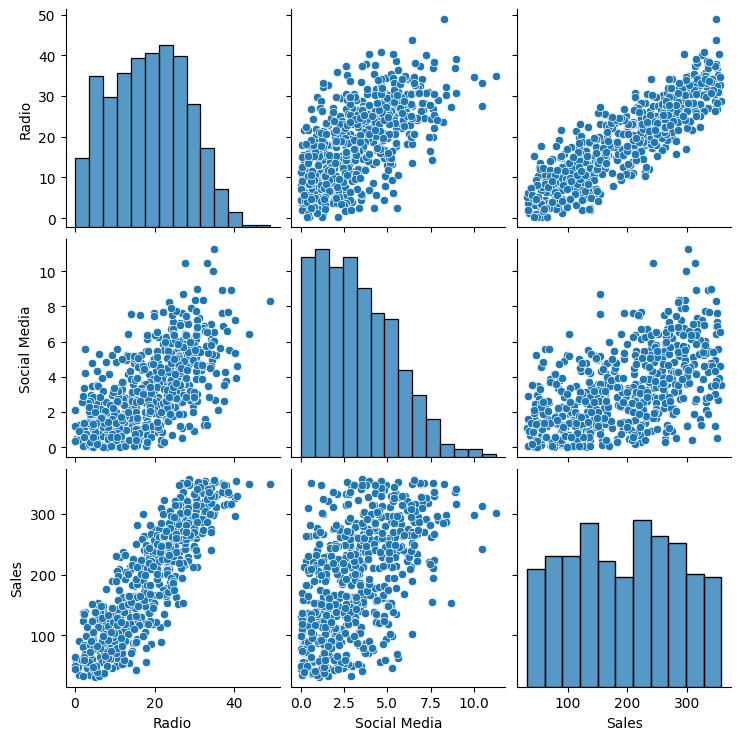

In [3]:
sns.pairplot(
    data = mktg_raw_data
)

In [4]:
# Get the mean sales for the categorical Data

mktg_raw_data[['TV', 'Sales']].groupby('TV').mean('Sales').reset_index()

,TV,Sales
0,High,300.529591
1,Low,91.646843
2,Medium,199.023461


In [5]:
mktg_raw_data[['Influencer', 'Sales']].groupby('Influencer').mean('Sales').reset_index()

,Influencer,Sales
0,Macro,205.660047
1,Mega,180.385096
2,Micro,198.655080
3,Nano,190.777766


***
## check and remove missing data

In [6]:
# check the shape of the dataframe

mktg_raw_data.shape

(572, 5)

In [7]:
mktg_raw_data.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [8]:
mask_na = mktg_raw_data.isna()
mask_na = mask_na.any(axis=1)

mktg_raw_data[mask_na]

,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


In [9]:
# since there are only 3 rows, I will drop those rows

mktg = mktg_raw_data.dropna()
mktg.shape

(569, 5)

In [10]:
# renaming social media columns

mktg = mktg.rename(columns={'Social Media': 'Social_Media'})

***
## Fit a multinear model to the data 

In [18]:
# Check if a model Social Media & Influencer vs a model TV & Radio have a higher impact in the Sales
# Both models have a categorical independent variable

# Create the model on function of the Social Media & Influencer
sm_infl_model = ols(formula = 'Sales ~ C(Influencer) + Social_Media', data = mktg).fit()

# Create a model in function of the TV & Radio
tv_rad_model = ols(data = mktg, formula = 'Sales ~ C(TV) + Radio').fit()

In [19]:
# Check the info form the Social Media & Influencer model
sm_infl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     56.85
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           2.66e-40
Time:                        16:04:02   Log-Likelihood:                -3273.0
No. Observations:                 569   AIC:                             6556.
Df Residuals:                     564   BIC:                             6578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                131.1403      8.436     15.546      0.000     114.571     147.710
C(Influencer)[T.Mega]    -16.5921      9.236     -1.796      0.073     -34.734       1.550
C(Influencer)[T.Micro]    -4.6133      9.246     -0.499      0.618     -22.773      13.547
C(Influencer)[T.Nano]     -9.1415      9.228     -0.991      0.322     -27.267       8.984
Social_Media              21.6464      1.465     14.773      0.000      18.768      24.524
==============================================================================
Omnibus:                       12.736   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.509
Skew:                           0.092   Prob(JB):                       0.0234
Kurtosis:                       2.468   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Check the model from Tv and Radio

tv_rad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          1.61e-287
Time:                        16:05:23   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""